# 4.4 Python 编程实践———病例自动诊断分析

## 1 业务理解

In [1]:
#略，详见教材上的内容解读。
#本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）的配套代码。

## 2 数据读入

In [2]:
import pandas as pd
import numpy as np
import os
    
print(os.getcwd())

c:\clm\00 BDA培训\第4章 分类分析


In [3]:
bc_data = pd.read_csv('bc_data.csv', header=0)
bc_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3 数据理解

In [4]:
bc_data.shape

(569, 32)

In [5]:
print(bc_data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
bc_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
bc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 4 数据准备

In [8]:
data = bc_data.drop(['id'], axis=1)

print(data.head(2))

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38           122.8     1001.0   
1         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33            184.6   
1         0.1812  ...         24.99          23.41            158.8   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890 

In [9]:
data = bc_data.drop(['id'], axis=1)
X_data = data.drop(['diagnosis'], axis=1)      
X_data.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [10]:
from sklearn.preprocessing import StandardScaler
means_normalization = StandardScaler()  #均值归一化处理
means_normalization.fit(X_data)  #进行训练集的“诊断学习”，得到方差和均值
X_data = means_normalization.transform(X_data)
X_data[2]

array([ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044,
        1.05292554,  1.36347845,  2.03723076,  0.93968482, -0.39800791,
        1.22867595, -0.78008338,  0.8509283 ,  1.18133606, -0.29700501,
        0.8149735 ,  0.21307643,  1.42482747,  0.23703554,  0.2935594 ,
        1.51187025, -0.02397438,  1.34747521,  1.45628455,  0.52740741,
        1.08293217,  0.85497394,  1.95500035,  1.152255  ,  0.20139121])

In [11]:
StandardScaler?

In [12]:
y_data = np.ravel(data[['diagnosis']])
y_data[0:6]
#Fancy indexing

array(['M', 'M', 'M', 'M', 'M', 'M'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
X_trainingSet, X_testSet, y_trainingSet, y_testSet = train_test_split(X_data
                                                                      , y_data
                                                                      , random_state=1
                                                                      ,test_size=0.25)

train_test_split?

In [14]:
print(X_trainingSet.shape)

(426, 30)


In [15]:
print(X_testSet.shape)

(143, 30)


## 5 算法选择及其超级参数的设置

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
myModel = KNeighborsClassifier(algorithm = 'kd_tree')



In [18]:
KNeighborsClassifier?

## 6 具体模型的训练

In [19]:
myModel.fit(X_trainingSet, y_trainingSet)
    

KNeighborsClassifier(algorithm='kd_tree')

In [20]:
myModel.fit?

In [21]:
myModel.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## 7 用模型进行预测

In [22]:
y_predictSet = myModel.predict(X_testSet)


In [23]:
print(y_predictSet)

['B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B']


In [24]:
print(y_testSet)

['B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B']


## 8 模型评价

In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_testSet, y_predictSet))



0.951048951048951


## 9 模型的应用与优化

In [26]:
#【思路】如果该模型的准确率可以满足业务需求，
    #那么，接下来可以用这个模型进行预测新数据或更多数据。


#【思路】如果该模型的准确率可以满足业务需求，
    #那么，进一步优化模型参数，甚至替换成其他算法/模型。
    
    

In [27]:
KNeighborsClassifier?

In [28]:
from sklearn.neighbors import KNeighborsClassifier
NumberOfNeighbors = range(1,23)
KNNs = [KNeighborsClassifier(n_neighbors=i) for i in NumberOfNeighbors]
range(len(KNNs))

range(0, 22)

In [29]:
scores = [KNNs[i].fit(X_trainingSet, y_trainingSet).score(X_testSet, y_testSet) for i in range(0,22)]

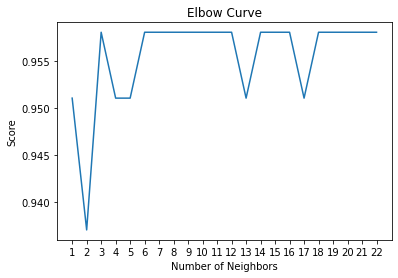

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(NumberOfNeighbors,scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(NumberOfNeighbors)
plt.show()

In [31]:
#重新预测
from sklearn.neighbors import KNeighborsClassifier


In [32]:
myModel = KNeighborsClassifier(algorithm='kd_tree',n_neighbors=6)
myModel.fit(X_trainingSet, y_trainingSet)
y_predictSet = myModel.predict(X_testSet)
y_predictSet[:6]

array(['B', 'M', 'B', 'M', 'B', 'M'], dtype=object)

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_testSet, y_predictSet))

0.958041958041958


In [34]:
KNeighborsClassifier?

In [35]:
y_predict = myModel.predict(X_testSet)
y_predict



array(['B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B'],
      dtype=object)

In [36]:
y_predict = myModel.predict(X_testSet[[121]])
y_predict

array(['M'], dtype=object)